In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('jallianwala_trends.csv')
df.head()

,Month,DaysToAnniversary,NewsArticles,YouTubeUploads,CommemorativeEvents,SearchInterest
0,2022-05,-347,37,7,0,17.3
1,2022-06,-316,30,4,1,0.0
2,2022-07,-286,37,10,0,28.7
3,2022-08,-255,41,9,0,36.1
4,2022-09,-224,34,12,1,37.9


# Preprocessing and Data Cleaning

In [4]:
df.isna().sum()

,0
Month,0
DaysToAnniversary,0
NewsArticles,0
YouTubeUploads,0
CommemorativeEvents,0
SearchInterest,0


# Feature Engeenering

In [5]:
df = df.drop('Month',axis = 1)


In [6]:
df.head()

,DaysToAnniversary,NewsArticles,YouTubeUploads,CommemorativeEvents,SearchInterest
0,-347,37,7,0,17.3
1,-316,30,4,1,0.0
2,-286,37,10,0,28.7
3,-255,41,9,0,36.1
4,-224,34,12,1,37.9


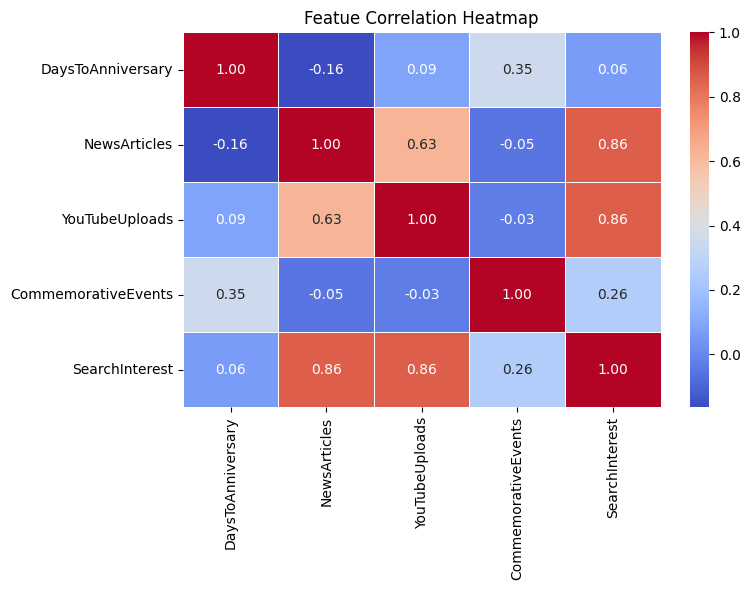

In [7]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.title('Featue Correlation Heatmap')
plt.tight_layout()
plt.show()

**From the above Heatmap we conclude that no multicollinearity is seen also DaysToAnniversary has a very weak effect on Search Interest .Same is the case with CommerativeEvents**

In [8]:
df['InverseDays'] = 1 / (np.abs(df['DaysToAnniversary']) + 1)
df['DaysSquared'] = df['DaysToAnniversary'] ** 2
df['AnniversaryMonth'] = df['DaysToAnniversary'].between(-15, 15).astype(int)


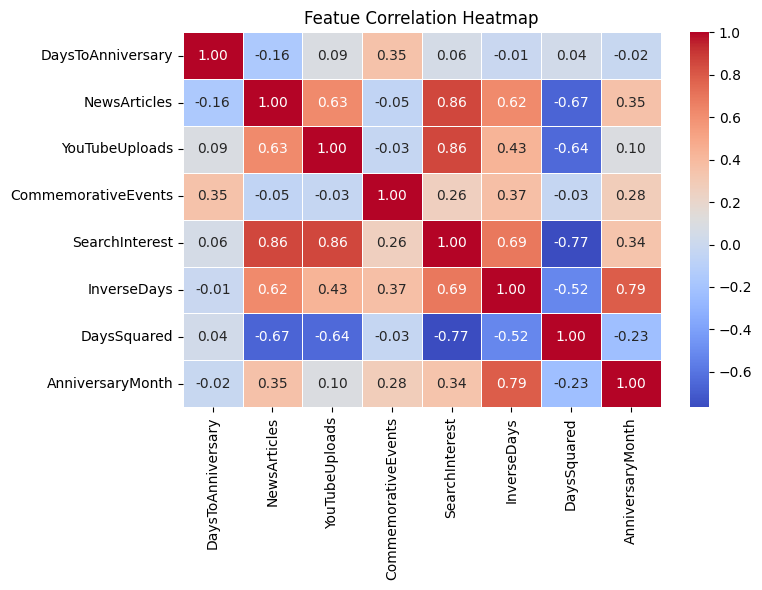

In [9]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.title('Featue Correlation Heatmap')
plt.tight_layout()
plt.show()

**Here DaysSquared and InverseDays show a Show a strong linear corelation so we ratain them**

*This signifies that interest declines as you move further from anniversary*

**Now we move to Commerative Events**

In [10]:
df['WeightedEvents'] = df['CommemorativeEvents'] / (abs(df['DaysToAnniversary']) + 1)
df['EventMediaInteraction'] = df['CommemorativeEvents'] * df['NewsArticles']
df['HasEvent'] = (df['CommemorativeEvents'] > 0).astype(int)
df['LogEvents'] = np.log1p(df['CommemorativeEvents'])

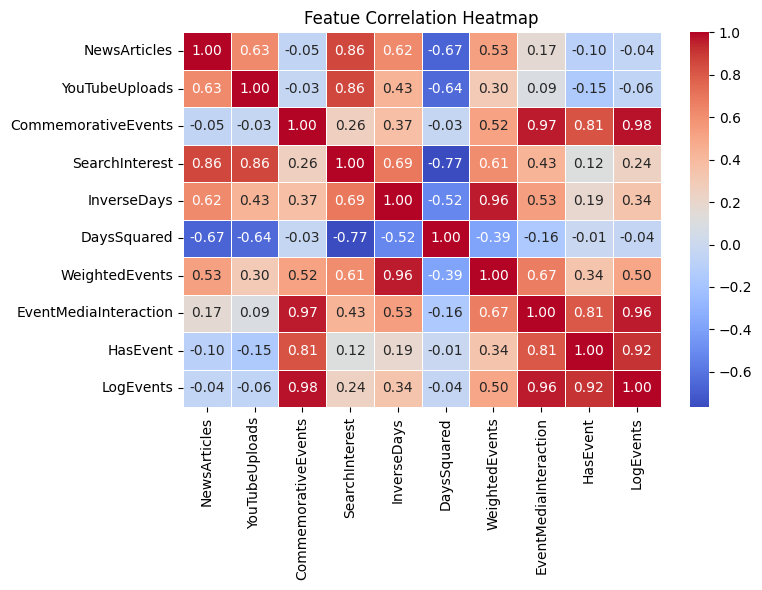

In [12]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.title('Featue Correlation Heatmap')
plt.tight_layout()
plt.show()

**Weighted events gets a good accuarcy**

*This implies that commerative events have a greater impact depending on the date*

In [11]:
df = df.drop(['DaysToAnniversary','AnniversaryMonth'],axis=1)

In [13]:
df = df.drop(['EventMediaInteraction','HasEvent','LogEvents'],axis=1)

In [16]:
df = df.drop('CommemorativeEvents',axis=1)

In [17]:
df.head()

,NewsArticles,YouTubeUploads,SearchInterest,InverseDays,DaysSquared,WeightedEvents
0,37,7,17.3,0.002874,120409,0.000000
1,30,4,0.0,0.003155,99856,0.003155
2,37,10,28.7,0.003484,81796,0.000000
3,41,9,36.1,0.003906,65025,0.000000
4,34,12,37.9,0.004444,50176,0.004444


In [18]:
df.to_csv("final_jallianwala_dataset.csv", index=False)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This is synthetic data and can be inaccurate